# Q1

**Answer**

Choose Random forest

1. The first reason to choose Random forest is that as our goal is to predict the player with highest performance, then model would provide a clear path to the evaluation procedure based on the constructed trees by RSS(in regression) or Gini-index(in classification).

2. The second reason to choose random forest is that it performs better on the training and testing sets. The estimated MSE of the random forest model is lower than that of the linear regression model, indicating that it has a lower error rate and is likely to make more accurate predictions.

3. It is important to note that MSE is just one metric for evaluating the performance of a model, and it may be useful to consider other metrics as well, such as accuracy or precision. However, if the random forest model consistently outperforms the linear regression model on multiple evaluation metrics, it is likely to be the more reliable model for making predictions in this scenario.

# Q2

**Answer**

Choose Linear model

1. The first reason is that as the data is all numeric(predictors and response), thus linear model would handle it more efficiently. 

2. Due to the goal is to find the plaque buildup in heart(as numeric), thus the output model should consist with the relationship among given numeric predictors. Linear model can generate a linear function whit reasonable interpretability.

3. Linear regression models are generally more interpretable than random forests, since the coefficients in a linear regression model can be directly interpreted as the average change in the response variable for a one unit change in the predictor. This may be important if you want to be able to understand how each predictor is influencing the response.

# Q3

Here I’ll run you through some code that could seem aggravating/confusing at first. 

Pause and consider what you’re asking the computer to do for each of these estimates of the MSE.

Which estimate is more believable as a long-run estimate of the MSE? Why?

In [1]:
library(randomForest)
library(gclus)
data(body)
set.seed(02139)
bodrun <- randomForest(Weight~Height+Gender, data=body)
bodrun

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: cluster




Call:
 randomForest(formula = Weight ~ Height + Gender, data = body) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 82.15451
                    % Var explained: 53.78

In [6]:
bodrun$mse[499]

[1] 82.13629

In [2]:
# FYI this matches the MSE from the printout
bodrun$mse[500] #the MSE: (regression only) vector of mean square errors: sum of squared residuals divided by n.
# The mse from the 500th random forest(the last RF) which trained the dataset with weight as response and Height & Gender as independent predictors.
# The mse is generated based on the true 

# FYI this also matches that printout
sum((body$Weight-predict(bodrun))^2)/length(body$Weight)
# sum( (y_true - y_pred)^2 ) / N 
# the MSE  

# but this is different!
sum((body$Weight-predict(bodrun, newdata=body))^2)/length(body$Weight) 
# newdata=body: a data frame or matrix containing new data. (Note: If not given, the out-of-bag prediction in object is returned.)


[1] 82.15451

[1] 82.15451

[1] 74.8239

**Answer**

- The first and second printout is the MSE from the Random Forest model **with** out-of-bag prediction.
- The third printout is the MSE from the Random Forest model **without** out-of-bag prediction.
- The model with OOB method is more believable as a long-run estimate of the MSE, which is the model from first and second printout.
- The OOB predictions provide an **unbiased estimate** of the model's performance


# Q4

On Canvas (in the assignment area), you will find a data set on the quality of red wines (different than the other wine data set we have previously considered in lectures).

Provide a thorough REGRESSION analysis attempting to predict the quality of wine according to the several predictors included in the data set. 

At minimum, trees, boosting, linear models, random forests, and lasso should be used...with appropriate diagnostics, sensible training/testing split, cross-validation, etc. 

Which model is most likely to provide the lowest MSE in the long-run? 

Which model would you choose if you were consulting a company on this data set? 

If they don’t match, explain why.

## LM 

In [8]:
wine <- read.csv("/Users/gawain/Desktop/3.UBC/Block3/DATA-571 - Resampling and Regularization/Assignment/A2/winequality-red.csv")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### Original LM

In [9]:
wine.lm <- lm(quality ~ fixed.acidity+volatile.acidity+citric.acid+residual.sugar+chlorides+free.sulfur.dioxide+total.sulfur.dioxide+density+pH+sulphates+alcohol, 
                  data=wine)
summary(wine.lm)


Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.197e+01  2.119e+01   1.036   0.3002    
fixed.acidity         2.499e-02  2.595e-02   0.963   0.3357    
volatile.acidity     -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
citric.acid          -1.826e-01  1.472e-01  -1.240   0.2150    
residual.sugar        1.633e-02  1.500e-02   1.089   0.2765    
chlorides            -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
free.sulfur.dioxide   4.361e-03  2.171e-03   2.009   0.0447 *  
total.sulfur.dioxide -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
density              -1.788e+01  2.163e+01  -0.827   0.4086    
pH                   -4.137e-

### Predictors selection with backward-AIC

In [11]:
library("MASS")
stepAIC(wine.lm, direction='both')


Start:  AIC=-1375.49
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- density               1     0.287 666.70 -1376.8
- fixed.acidity         1     0.389 666.80 -1376.5
- residual.sugar        1     0.498 666.91 -1376.3
- citric.acid           1     0.646 667.06 -1375.9
<none>                              666.41 -1375.5
- free.sulfur.dioxide   1     1.694 668.10 -1373.4
- pH                    1     1.957 668.37 -1372.8
- chlorides             1     8.391 674.80 -1357.5
- total.sulfur.dioxide  1     8.427 674.84 -1357.4
- sulphates             1    26.971 693.38 -1314.0
- volatile.acidity      1    33.620 700.03 -1298.8
- alcohol               1    45.672 712.08 -1271.5

Step:  AIC=-1376.8
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + to


Call:
lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol, data = wine)

Coefficients:
         (Intercept)      volatile.acidity             chlorides  
            4.430099             -1.012753             -2.017814  
 free.sulfur.dioxide  total.sulfur.dioxide                    pH  
            0.005077             -0.003482             -0.482661  
           sulphates               alcohol  
            0.882665              0.289303  


### AIC result(7 predictors)

In [12]:
wine.lm.AIC <- lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + pH + sulphates + alcohol, 
            data = wine)
summary(wine.lm.AIC)


Call:
lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68918 -0.36757 -0.04653  0.46081  2.02954 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.4300987  0.4029168  10.995  < 2e-16 ***
volatile.acidity     -1.0127527  0.1008429 -10.043  < 2e-16 ***
chlorides            -2.0178138  0.3975417  -5.076 4.31e-07 ***
free.sulfur.dioxide   0.0050774  0.0021255   2.389    0.017 *  
total.sulfur.dioxide -0.0034822  0.0006868  -5.070 4.43e-07 ***
pH                   -0.4826614  0.1175581  -4.106 4.23e-05 ***
sulphates             0.8826651  0.1099084   8.031 1.86e-15 ***
alcohol               0.2893028  0.0167958  17.225  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6477 on 1591 degrees of freedom
Multiple R-squared:  0.3595,

## RF

In [57]:
library(tree)
rf <- randomForest(quality~ ., data=wine)
rf


Call:
 randomForest(formula = quality ~ ., data = wine) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.3164447
                    % Var explained: 51.45

In [59]:
summary(rf)

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted       1599   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1599   -none- numeric  
importance        11   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1599   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [62]:
cat("MSE for rf with whole dataset:", mean(rf$mse))

MSE for rf with whole dataset: 0.327772

In [60]:
rf$importance

,IncNodePurity
fixed.acidity,60.51724
volatile.acidity,127.22164
citric.acid,69.59669
residual.sugar,53.64570
chlorides,69.21500
free.sulfur.dioxide,50.74687
total.sulfur.dioxide,83.60775
density,84.85590
pH,58.74381
sulphates,136.28431


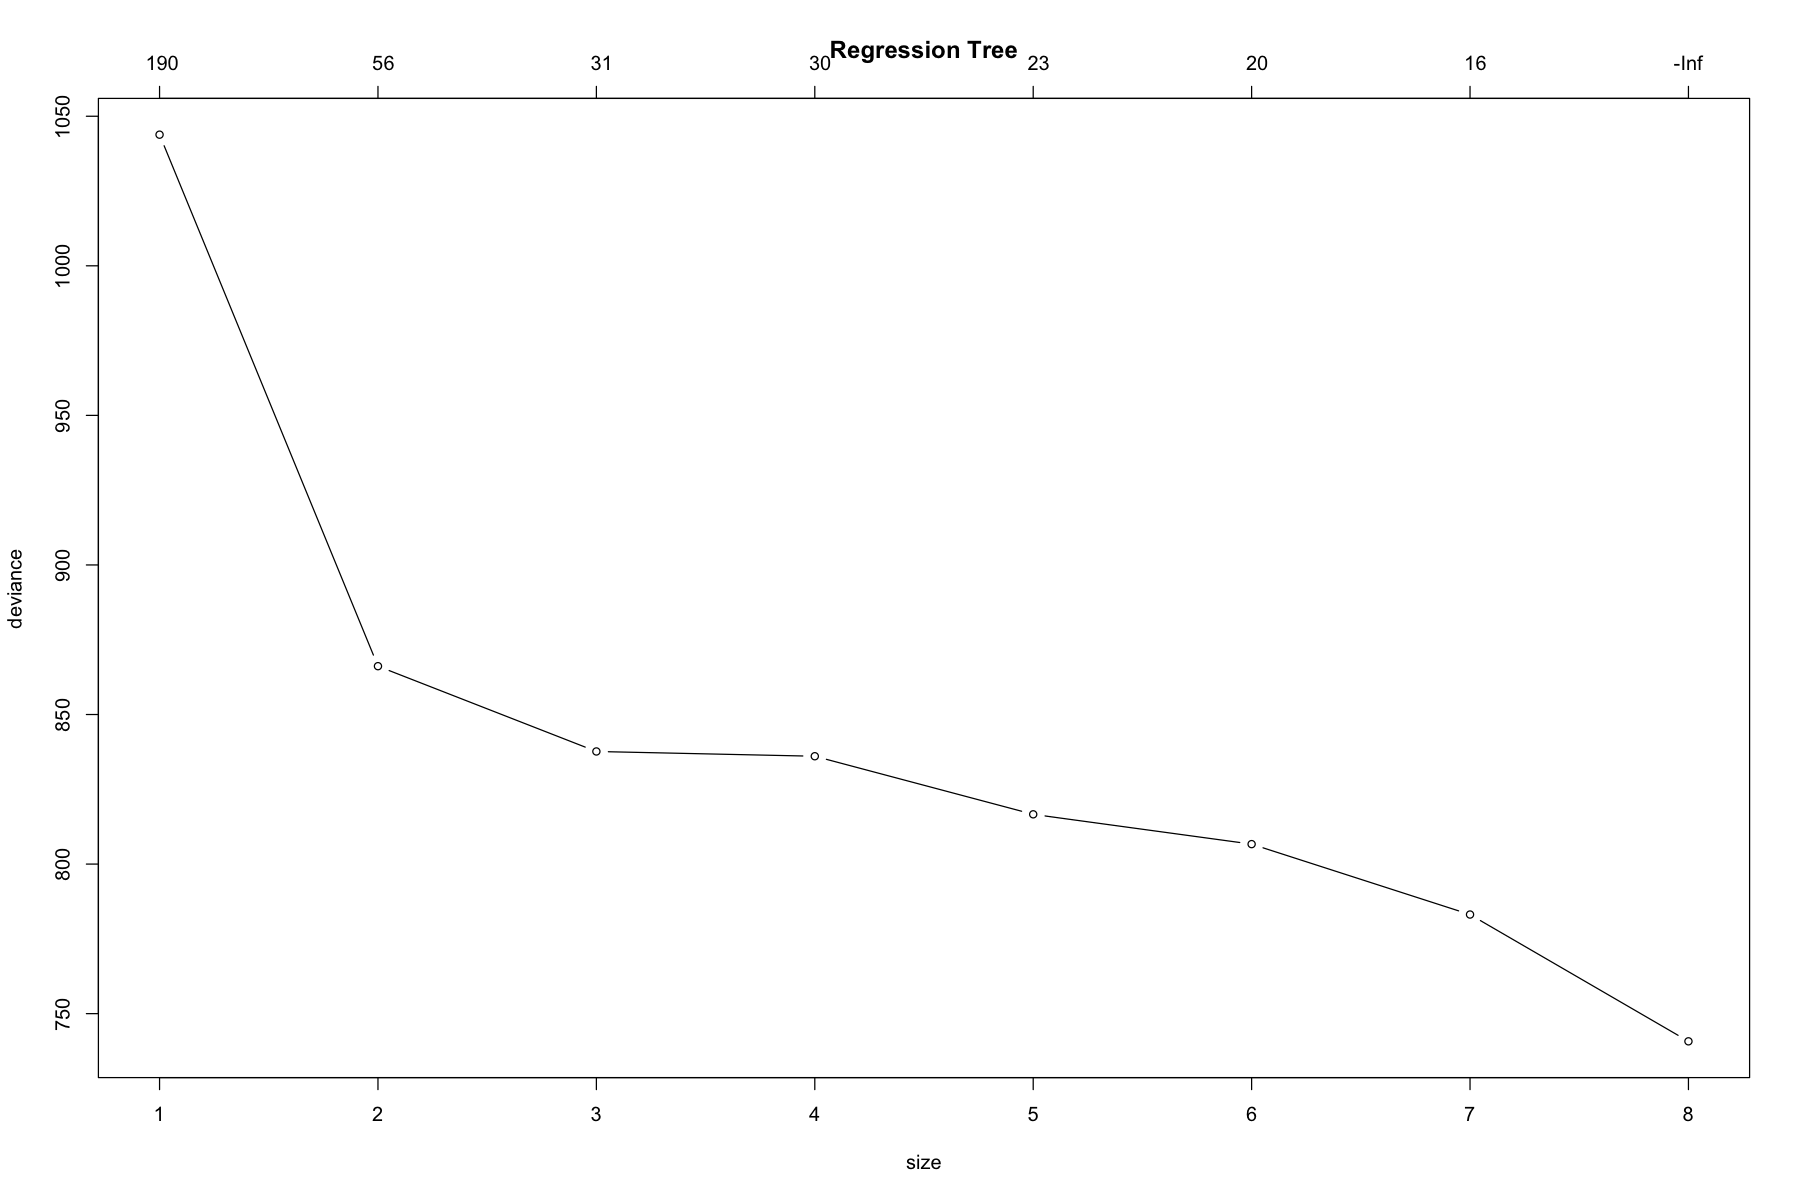

In [52]:
#  10-fold cross-validation using cv.tree
cv_rf <- cv.tree(rf, K=10)
importance
plot(cv_rf, main="Regression Tree", cex=0.8, type='b')

In [54]:
prune_tree <- prune.tree(simtree, best=8)
y_pred <- predict(prune_tree, wine, type="vector")
MSE <- mean((wine$quality - y_pred)^2) # MSE as estimated via 1-fold-CV for the best-node-size case only
cat('the MSE of the test set is:', MSE)

the MSE of the test set is: 0.4254908

### prune tree

In [33]:
nrow(wine) * 0.8

[1] 1279.2

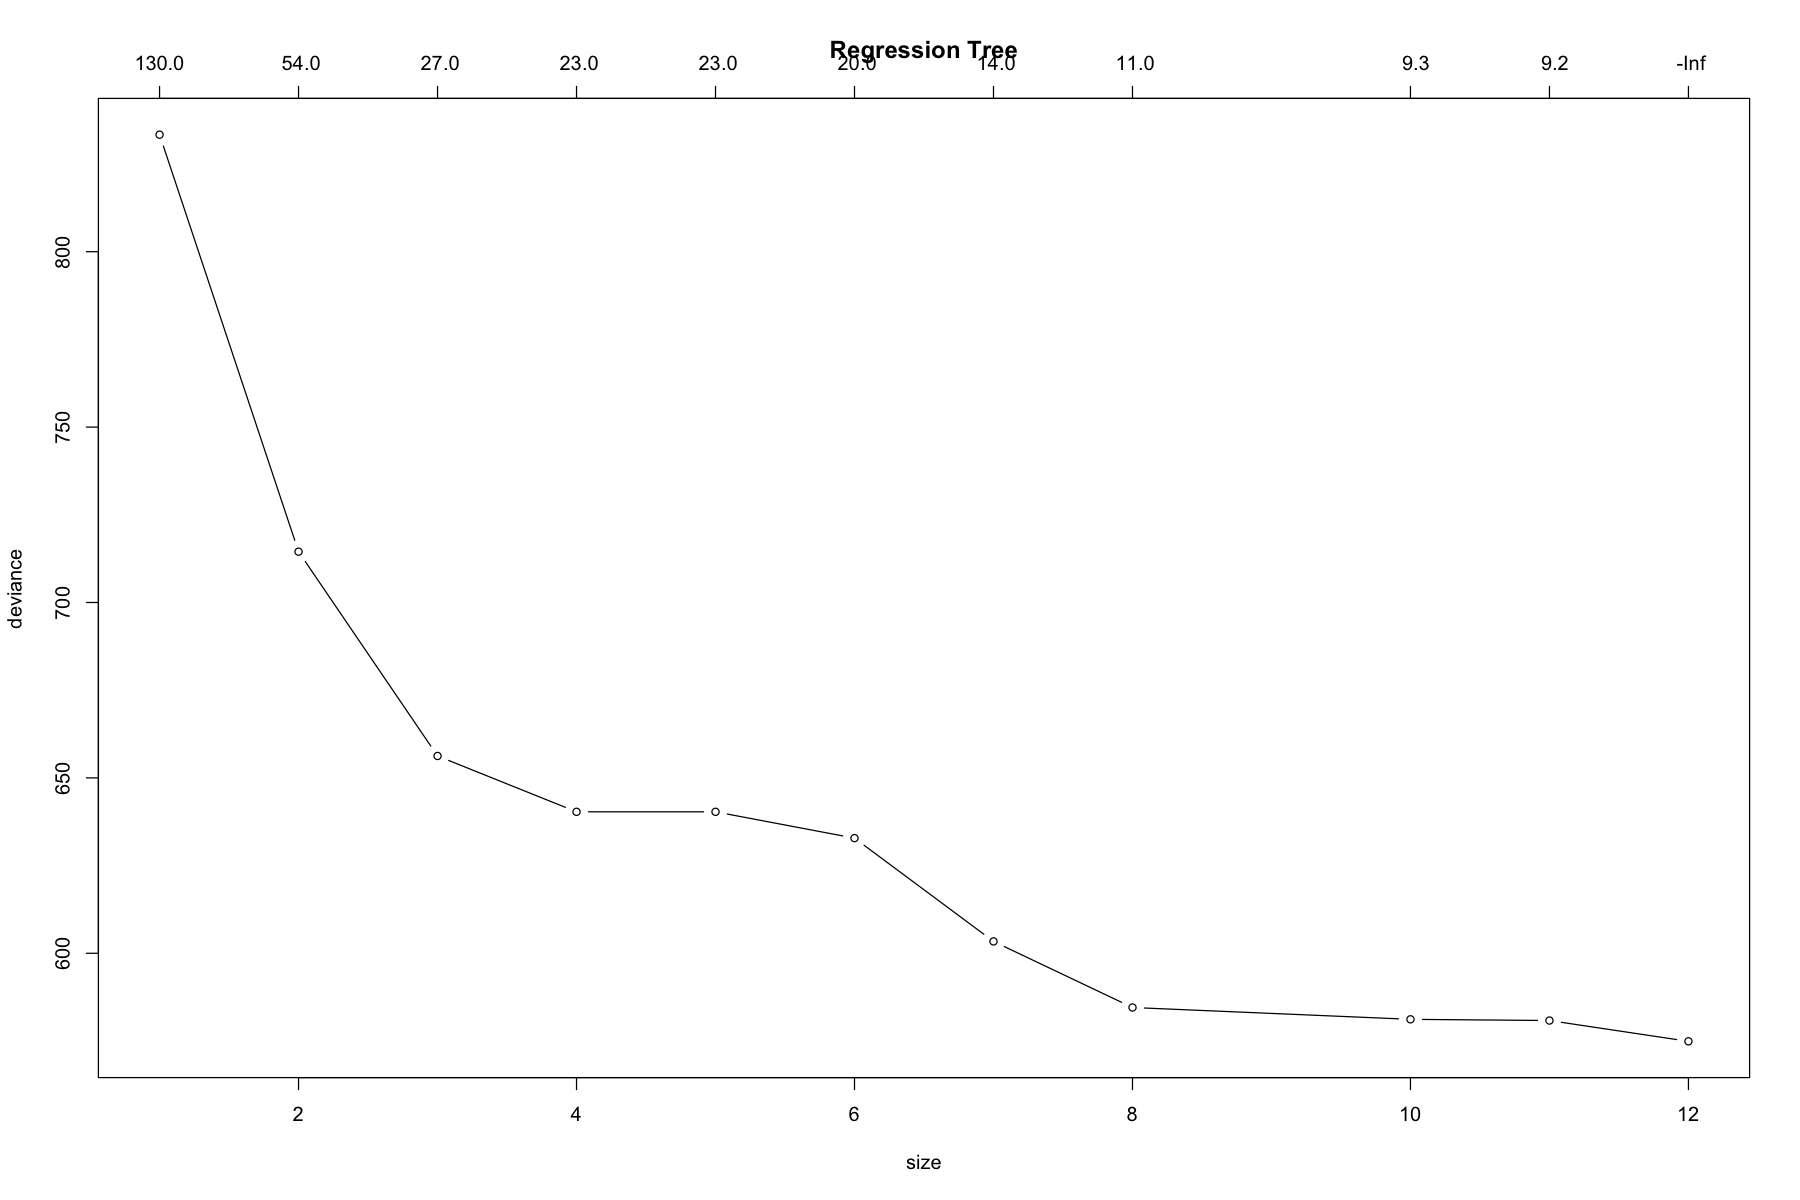

In [40]:
dsindex <- sample(1:nrow(wine), 1279)  #80% for training; 20% for testing
dstrain <- wine[dsindex, ] 
dstest <- wine[-dsindex, ] 
simtree2 <- tree(quality~ ., data=dstrain)

#  10-fold cross-validation using cv.tree
cv_tree2 <- cv.tree(simtree2, K=10)
loocv_RSS <- cv_tree2$dev[1]
plot(cv_tree2, main="Regression Tree", cex=0.8, type='b')

In [46]:
prune_tree2 <- prune.tree(simtree2, best=12)
y_pred <- predict(prune_tree2, dstest[1:11], type="vector")
MSE <- mean((dstest$quality - y_pred)^2) 
cat('the MSE of the test set is:', MSE)

the MSE of the test set is: 0.4567772